In [6]:
%load_ext sql
%sql sqlite:///base.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [7]:
%%sql
PRAGMA foreign_keys=on;

DROP TABLE if exists Products;
DROP TABLE if exists Items;
DROP TABLE if exists Invoices;
DROP TABLE if exists Customers;

CREATE TABLE Invoices (
          invoice_ID integer NOT NULL Primary key,
          prod_id integer NOT NULL,
          invoice_date datetime NOT NULL,
          FOREIGN KEY (prod_id) REFERENCES Products(product_id)
          );

CREATE TABLE Products (
          product_id integer NOT NULL Primary key,
          product_name varchar(20) NOT NULL,
          price integer DEFAULT 0
          );

 * sqlite:///base.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [8]:
%%sql
PRAGMA table_info(Products);

 * sqlite:///base.db
Done.


[(0, 'product_id', 'INTEGER', 1, None, 1),
 (1, 'product_name', 'varchar(20)', 1, None, 0),
 (2, 'price', 'INTEGER', 0, '0', 0)]

Документация по Schema:
https://www.sqlite.org/schematab.html

In [9]:
%%sql
select * from sqlite_master;

 * sqlite:///base.db
Done.


[('table', 'Invoices', 'Invoices', 2, 'CREATE TABLE Invoices (\n          invoice_ID integer NOT NULL Primary key,\n          prod_id integer NOT NULL,\n          invoice_date datetime NOT NULL,\n          FOREIGN KEY (prod_id) REFERENCES Products(product_id)\n          )'),
 ('table', 'Products', 'Products', 3, 'CREATE TABLE Products (\n          product_id integer NOT NULL Primary key,\n          product_name varchar(20) NOT NULL,\n          price integer DEFAULT 0\n          )')]

ALTER TABLE

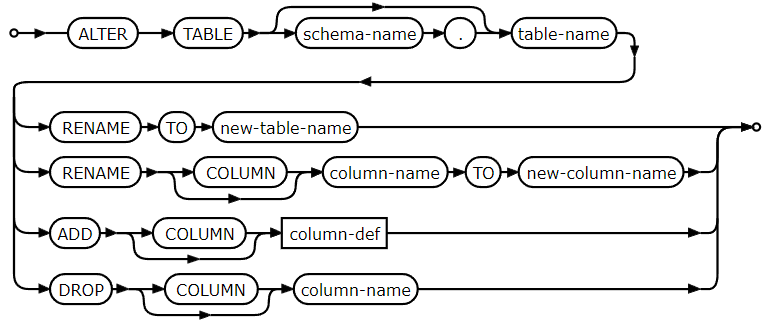

In [10]:
%%sql

--AUTOINCREMENT

INSERT INTO Products VALUES (NULL, 'Ноутбук', 35000);
INSERT INTO Products VALUES (NULL, 'Микрофон', 2000);
INSERT INTO Products VALUES (NULL, 'Смартфон', 42000);
INSERT INTO Products (product_name, price) VALUES ('Смартфон', 22000);
INSERT INTO Products (product_name, price) VALUES ('Монитор', 12000);

 * sqlite:///base.db
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [11]:
%%sql
SELECT * FROM Products;

 * sqlite:///base.db
Done.


[(1, 'Ноутбук', 35000),
 (2, 'Микрофон', 2000),
 (3, 'Смартфон', 42000),
 (4, 'Смартфон', 22000),
 (5, 'Монитор', 12000)]

In [12]:
%%sql
INSERT INTO Products VALUES (7, 'Смартфон', 22000);
INSERT INTO Products VALUES (NULL, 'Телевизор', 12000);

 * sqlite:///base.db
1 rows affected.
1 rows affected.


[]

In [13]:
%%sql
ALTER TABLE Products ADD COLUMN description varchar(20);

 * sqlite:///base.db
Done.


[]

In [14]:
%%sql
PRAGMA table_info(Products);

 * sqlite:///base.db
Done.


[(0, 'product_id', 'INTEGER', 1, None, 1),
 (1, 'product_name', 'varchar(20)', 1, None, 0),
 (2, 'price', 'INTEGER', 0, '0', 0),
 (3, 'description', 'varchar(20)', 0, None, 0)]

RENAME TABLE

In [15]:
%%sql
ALTER TABLE Products RENAME TO Items;

 * sqlite:///base.db
Done.


[]

In [16]:
%%sql
select * from sqlite_master;

 * sqlite:///base.db
Done.


[('table', 'Invoices', 'Invoices', 2, 'CREATE TABLE Invoices (\n          invoice_ID integer NOT NULL Primary key,\n          prod_id integer NOT NULL,\n          invoice_date datetime NOT NULL,\n          FOREIGN KEY (prod_id) REFERENCES "Items"(product_id)\n          )'),
 ('table', 'Items', 'Items', 3, 'CREATE TABLE "Items" (\n          product_id integer NOT NULL Primary key,\n          product_name varchar(20) NOT NULL,\n          price integer DEFAULT 0\n          , description varchar(20))')]

In [17]:
%%sql
SELECT * FROM Items;

 * sqlite:///base.db
Done.


[(1, 'Ноутбук', 35000, None),
 (2, 'Микрофон', 2000, None),
 (3, 'Смартфон', 42000, None),
 (4, 'Смартфон', 22000, None),
 (5, 'Монитор', 12000, None),
 (7, 'Смартфон', 22000, None),
 (8, 'Телевизор', 12000, None)]

UPDATE & DELETE

In [18]:
%%sql
UPDATE Items SET description = "ACER" WHERE product_name = 'Ноутбук';

 * sqlite:///base.db
1 rows affected.


[]

In [19]:
%%sql
UPDATE Items SET price = price*2 WHERE product_name = 'Смартфон';

 * sqlite:///base.db
3 rows affected.


[]

In [20]:
%%sql
SELECT * FROM Items;

 * sqlite:///base.db
Done.


[(1, 'Ноутбук', 35000, 'ACER'),
 (2, 'Микрофон', 2000, None),
 (3, 'Смартфон', 84000, None),
 (4, 'Смартфон', 44000, None),
 (5, 'Монитор', 12000, None),
 (7, 'Смартфон', 44000, None),
 (8, 'Телевизор', 12000, None)]

In [21]:
%%sql
DELETE FROM Items WHERE product_id = 5;

 * sqlite:///base.db
1 rows affected.


[]

**Переименовать столбец в таблице**

<s>Нельзя использовать оператор ALTER TABLE для переименования столбца в SQLite. Вместо этого нужно переименовать таблицу, создать новую таблицу и скопировать данные в новую таблицу.</s>

Теперь можно :)

In [22]:
%%sql

ALTER TABLE Items RENAME COLUMN product_id TO id;

 * sqlite:///base.db
Done.


[]

In [23]:
%%sql

-- Альтернатива (всё равно полезно знать)

PRAGMA foreign_keys=off; -- Первый этап - отключение внешних ключей

CREATE TABLE _Items_new (
    id integer NOT NULL Primary key,
    name varchar(20) NOT NULL,
    price integer DEFAULT 0,
    description varchar(20));

INSERT INTO _Items_new
  SELECT *
  FROM Items;

DROP TABLE if exists Items;

ALTER TABLE _Items_new RENAME TO Items;

PRAGMA foreign_keys=on;

 * sqlite:///base.db
Done.
Done.
6 rows affected.
Done.
Done.
Done.


[]

In [24]:
%%sql
SELECT * FROM Items;

 * sqlite:///base.db
Done.


[(1, 'Ноутбук', 35000, 'ACER'),
 (2, 'Микрофон', 2000, None),
 (3, 'Смартфон', 84000, None),
 (4, 'Смартфон', 44000, None),
 (7, 'Смартфон', 44000, None),
 (8, 'Телевизор', 12000, None)]

In [25]:
%%sql
PRAGMA table_info(Items);

 * sqlite:///base.db
Done.


[(0, 'id', 'INTEGER', 1, None, 1),
 (1, 'name', 'varchar(20)', 1, None, 0),
 (2, 'price', 'INTEGER', 0, '0', 0),
 (3, 'description', 'varchar(20)', 0, None, 0)]

In [26]:
%%sql
ALTER TABLE Items DROP COLUMN description;

 * sqlite:///base.db
Done.


[]

In [27]:
%%sql
SELECT * FROM Items;

 * sqlite:///base.db
Done.


[(1, 'Ноутбук', 35000),
 (2, 'Микрофон', 2000),
 (3, 'Смартфон', 84000),
 (4, 'Смартфон', 44000),
 (7, 'Смартфон', 44000),
 (8, 'Телевизор', 12000)]

In [28]:
%%sql
ALTER TABLE Items DROP COLUMN id;

-- поменять первичный ключ (как и любые свойства таблицы - в SQlite напрямую нельзя)

 * sqlite:///base.db
(sqlite3.OperationalError) cannot drop PRIMARY KEY column: "id"
[SQL: ALTER TABLE Items DROP COLUMN id;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
